In [12]:
import scipy.io as sio
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import pandas as pd
import time

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Utils

In [21]:
def AddBias(X): return np.hstack(( X, np.ones((np.size(X,0),1)) ))

In [13]:
def predict(X, fitted_weight):
    
    h = hypothesis(X,fitted_weight)
    Theta = sigmoid_theta(h)

    Theta[Theta>0.5] = 1
    Theta[Theta<=0.5] = -1
    
    return Theta

def acc_score(y_pred, y_true):
    return np.sum(y_pred == y_true)/len(y_true)


In [14]:
def find(x): return np.nonzero(x)[0]


#Usefull function to convert to a column vector.
#  convert to a column vector
def MakeCol(y): return y.reshape(-1,1)
#  convert to a row vector
def MakeRow(y): return y.reshape(1,-1)
# find non zero/true elements
def find(x): return np.nonzero(x)[0]


In [15]:
def _check_inputs(X,y, batch_size, w_init, tol, step_init, max_epoch=100, verbose = -1):
    """
    Ensure that the inputs are of the right form and all necessary inputs have been supplied
    """
    
    if not isinstance(X, (np.ndarray)):
        raise TypeError('Invalid input type for X')
    if not isinstance(y, (np.ndarray)):
        raise TypeError('Invalid input type for X')
    if not isinstance(w_init, (np.ndarray)):
        raise TypeError('Invalid input type for X')

    assert X.shape[0] == y.shape[0], "arrays X and y must have the same number of rows"
    assert X.shape[1] == w_init.shape[0], "Weight-array must have dimensions [X.shape(1), 1]"
    assert w_init.shape[1] == 1
    assert len(X.shape) == 2
    assert (y.shape)[1] == 1

    if not isinstance(batch_size, (int)):
        raise TypeError('batch_size must be an int')
    if not isinstance(tol, (float)):
        raise TypeError('tol must be a float')
    if not isinstance(step_init, (float)):
        raise TypeError('step_init must be a float')
    if not isinstance(max_epoch, (int)):
        raise TypeError('max_epoch must be an int')
    elif max_epoch <= 0:
        raise ValueError('max_epoch must be larger than 0')
    
    


In [16]:
def sgd(X,y, batch_size, w_init, tol, step_init, max_epoch=100, verbose = -1, ):    
    """

    Parameters
    ----------
    X : Numpy array with shape (num_samples, num_features)
        Design Matrix of Logistic Regression
    y : Numpy array with shape (num_samples, 1)
        Dependent variable
    batch_size : int
        Mini batch-size
    w_init : Numpy array with shape (num_features, 1)
        The weight-vector
    # tol : [type]
        # [description]
    step_init : float
        The learning rate of Stochastic Gradient Descent
    max_epoch : int, optional
        [Max number of interations], by default 100
    verbose : int, optional
        [If verbose is bigger than one, the function will print information], by default -1
    """
    
    
    _check_inputs(X,y, batch_size, w_init, step_init = step_init,
                               max_epoch=max_epoch, tol = tolerance, verbose=0)


        
    # set dimensions and samples
    p = X.shape[1]
    n = len(X)
    
    # initialize
    total_iter = 0
    epoch = 0
    grad_calc_count = 0
    w = w_init
    previous_weight = w.copy()
    tol_conv=False
    
    num_of_batches = int(np.floor(n / batch_size))
    step=step_init

    # prepare an array of gradients, and a valiable of average gradient
    grad_array = np.zeros((p, (num_of_batches)))
    grad_avg = np.zeros(w_init.shape)
    

    # set start time
    start_time = time.time()
    
    # permute samples (ToDo)
    perm_idx = np.random.permutation(len(X))     

    cost_list = []
    #     while (optgap > tol) & (epoch < options.max_epoch):
    while (epoch < max_epoch):
        
        
        for i in range(int(num_of_batches)):
            
            # update step-size (learning rate decay)
            step = step

            # extract a random sample
            start_index = (i) * batch_size + 1;
            
            indice_j = perm_idx[start_index:(start_index+batch_size)]
            
            # calculate gradient
            grad = nablaE(X[indice_j], y[indice_j], w) ## Calc the weight for this particular idx

            
            # update weights
            w = w - (step * grad)
            
            
            total_iter = total_iter + 1;
        
        # measure elapsed time
        elapsed_time = time.time() - (start_time)
                
        # count gradient evaluations
        grad_calc_count = grad_calc_count + int(num_of_batches * batch_size)        
        epoch = epoch + 1;
        
        # store infos
        f_val = L(hypothesis(X,w), y)
        
        # Check weight variation
        max_weight = w.max()
        max_change = np.max(np.abs( w  - previous_weight))
        
        if (max_weight != 0 and np.abs(max_change / max_weight) <= tol) or (max_weight == 0 and max_change == 0):
            tol_conv = True
            break
#             print('Convergence tolerance reached: tol = {0} ||| (max_change/max_weight) = {1}'\
#                                .format(tol,np.abs(max_change / max_weight)))

        previous_weight = w

        # display infos
        if verbose > 0:
            print('Epoch = {}, cost = {}'.format(epoch, f_val))
            print(np.linalg.norm(previous_weight))
    
        cost_list.append(f_val)
    if tol_conv == True:
        print('Epoch:{2}. Convergence tolerance reached: tol = {0} ||| (max_change/max_weight) = {1}'\
                               .format(tol,np.abs(max_change / max_weight), epoch))
    else: 
        print('Max epoch reached: max_epochr = {}'.format(max_epoch))
    
    
    return w, cost_list


def nablaE(X, y, w):
    n = len(X)
    n = 1
    
    s = hypothesis(X,w)
 
    v = -s *y

    theta = sigmoid_theta(v)
    nablaL = (-1/n) * y * theta

    return X.T.dot(nablaL)    

def hypothesis(X, w): 
    """Will return one hypothesis per sample (X.w)"""
    assert X.shape[1] == w.shape[0], "X must be an array (n_samples,n_features) and w (n_features,1)"
    return np.dot(X, w) 


def sigmoid_theta(v): 
    """
    Calculate probability (predict proba)
    """
    return 1 / (1 + np.exp(-v))



def L(s,y):
    n = len(s)
    'Loss'
    return (1/n) * sum( np.log( 1 + np.exp(-s*y) ) )


In [17]:
def sag2(X,y, batch_size, w_init, tol, step_init, max_epoch=100, verbose = -1, ):    
    """
    Basically copied from https://github.com/hiroyuki-kasai/SGDLibrary/blob/f15f042ef4a409a075096a1e4b7462263cce520c/sgd_solver/sag.m


    Performs Stochastic average descent (SAG) algorithm.  
    
    References:
        N. L. Roux, M. Schmidt, and F. R. Bach, 
        "A stochastic gradient method with an exponential convergence rate for finite training sets,"
        NIPS, 2012.
    
        SGDLibrary - https://github.com/hiroyuki-kasai/SGDLibrary.



    Parameters
    ----------
    X : Numpy array with shape (num_samples, num_features)
        Design Matrix of Logistic Regression
    y : Numpy array with shape (num_samples, 1)
        Dependent variable
    batch_size : int
        Mini batch-size
    w_init : Numpy array with shape (num_features, 1)
        The weight-vector
    # tol : [type]
        # [description]
    step_init : float
        The learning rate of Stochastic Gradient Descent
    max_epoch : int, optional
        [Max number of interations], by default 100
    verbose : int, optional
        [If verbose is bigger than one, the function will print information], by default -1
    """
    
    
    _check_inputs(X,y, batch_size, w_init, step_init = step_init,
                               max_epoch=max_epoch, tol = tolerance, verbose=0)


        
    # set dimensions and samples
    p = X.shape[1]
    n = len(X)
    
    # initialize
    total_iter = 0
    epoch = 0
    grad_calc_count = 0
    w = w_init
    previous_weight = w.copy()
    tol_conv=False
    
    num_of_batches = int(np.floor(n / batch_size))
    step=step_init

    # prepare an array of gradients, and a valiable of average gradient
    grad_array = np.zeros((p, (num_of_batches)))
    grad_avg = np.zeros(w_init.shape)
    

    # set start time
    start_time = time.time()
    
    # permute samples (ToDo)
    perm_idx = np.random.permutation(len(X))     

    cost_list = []
    #     while (optgap > tol) & (epoch < options.max_epoch):
    while (epoch < max_epoch):
        
        
        for i in range(int(num_of_batches)):
            
            # update step-size (learning rate decay)
            step = step

            # extract a random sample
            start_index = (i) * batch_size + 1;
            
            indice_j = perm_idx[start_index:(start_index+batch_size)]
            
            # calculate gradient
            grad = nablaE(X[indice_j], y[indice_j], w) ## Calc the weight for this particular idx

            # update average gradient
#             grad_avg = grad_avg + (grad - (MakeCol((grad_array[:, i])) ))
            grad_avg = grad_avg + ((grad - MakeCol(grad_array[:, i])) / num_of_batches)

            # replace with new grad
            grad_array[:, i] = MakeRow(grad)#.flatten()
            
            # update weights
            w = w - (step * grad_avg)
            
            
            total_iter = total_iter + 1;
        
        # measure elapsed time
        elapsed_time = time.time() - (start_time)
                
        # count gradient evaluations
        grad_calc_count = grad_calc_count + int(num_of_batches * batch_size)        
        epoch = epoch + 1;
        
        # store infos
        f_val = L(hypothesis(X,w), y)
        
        # Check weight variation
        max_weight = w.max()
        max_change = np.max(np.abs( w  - previous_weight))
        
        if (max_weight != 0 and np.abs(max_change / max_weight) <= tol) or (max_weight == 0 and max_change == 0):
            tol_conv = True
            break
#             print('Convergence tolerance reached: tol = {0} ||| (max_change/max_weight) = {1}'\
#                                .format(tol,np.abs(max_change / max_weight)))

        previous_weight = w

        # display infos
        if verbose > 0:
            print('Epoch = {}, cost = {}'.format(epoch, f_val))
            print(np.linalg.norm(previous_weight))
    
        cost_list.append(f_val)
    if tol_conv == True:
        print('Epoch:{2}. Convergence tolerance reached: tol = {0} ||| (max_change/max_weight) = {1}'\
                               .format(tol,np.abs(max_change / max_weight), epoch))
    else: 
        print('Max epoch reached: max_epochr = {}'.format(max_epoch))
    
    
    return w, cost_list


def nablaE(X, y, w):
    n = len(X)
    n = 1
    
    s = hypothesis(X,w)
 
    v = -s *y

    theta = sigmoid_theta(v)
    nablaL = (-1/n) * y * theta

    return X.T.dot(nablaL)    

def hypothesis(X, w): 
    """Will return one hypothesis per sample (X.w)"""
    assert X.shape[1] == w.shape[0], "X must be an array (n_samples,n_features) and w (n_features,1)"
    return np.dot(X, w) 


def sigmoid_theta(v): 
    """
    Calculate probability (predict proba)
    """
    return 1 / (1 + np.exp(-v))



def L(s,y):
    n = len(s)
    'Loss'
    return (1/n) * sum( np.log( 1 + np.exp(-s*y) ) )


# Data

[2.5  1.25]


Text(0, 0.5, 'Feature 1')

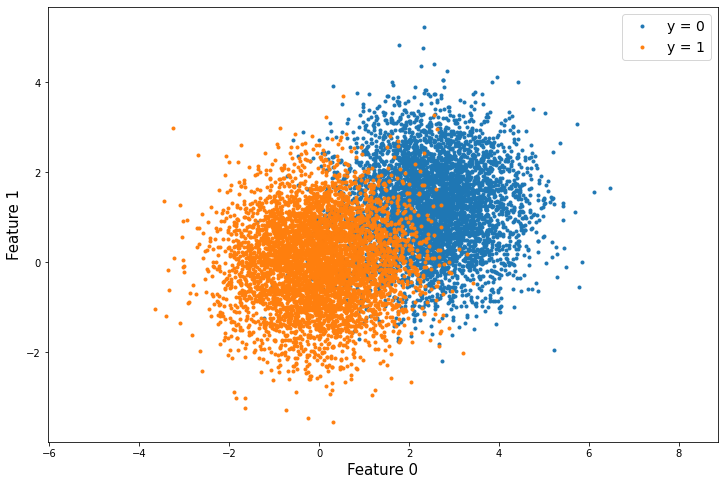

In [23]:
n = 10000 # number of sample
p = 2 # dimensionality
omega = np.array([1,.5])*2.5 # offset of the two dimesionalities
print(omega)
n1 = int(n/2)
## The 1 class is a gaussian distribuition and the 0 other one is a gaussian + offset
X = np.vstack(( np.random.randn(n1,2), np.random.randn(n1,2)+np.ones([n1,1])*omega ))
y = np.vstack(( np.ones([n1,1]), -np.ones([n1,1]) ))

## Indices for each classes
idx_0 = find(y<=0)
idx_1 = find(y==1)

# Plotting class blobs

plt.subplots(figsize=(12,8))
plt.plot(X[idx_0,0], X[idx_0,1], '.', label = 'y = 0')
plt.plot(X[idx_1,0], X[idx_1,1], '.',  label = 'y = 1')
plt.axis('equal')
plt.legend(prop = {"size" : 14})
plt.xlabel("Feature 0", size = 15)
plt.ylabel("Feature 1", size = 15)

## Scalling Data

In [19]:
scaler = MinMaxScaler()


X_scaled = scaler.fit_transform(X)



# Algos

## Sgd


In [22]:
X_ = AddBias(X)
# X = np.hstack(( X, np.ones((np.size(X,0),1)) ))

w_init = np.random.randn(X_.shape[1]).reshape(-1,1)
tolerance = 0.00001
n = len(X_scaled)

max_epoch = 500
step_init = 1e-5
batch_size = 250
# batch_size = 1000


## Running SAG
# fitted_weight, cost_list = sag2(X_,y, batch_size, w_init, step_init = step_init,
#                                max_epoch=max_epoch, tol = tolerance, verbose=0)

fitted_weight, cost_list = sgd(X_,y, batch_size, w_init, step_init = step_init,
                               max_epoch=max_epoch, tol = tolerance, verbose=0)

## Plot cost

Max epoch reached: max_epochr = 500


Text(0.5, 1.0, '$Cost (w_l)$')

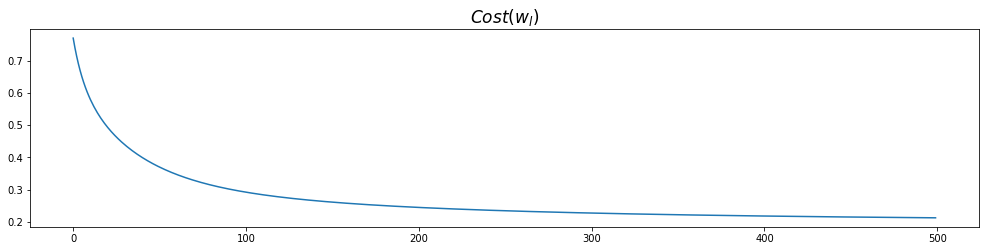

In [24]:
## display ##
plt.subplots(figsize=(17,8))
plt.subplot(2,1,1)
plt.plot(np.arange(0,len(cost_list)), cost_list)
plt.axis('tight')
plt.title('$Cost (w_l)$',  size = 17)

### Plot Decision Function

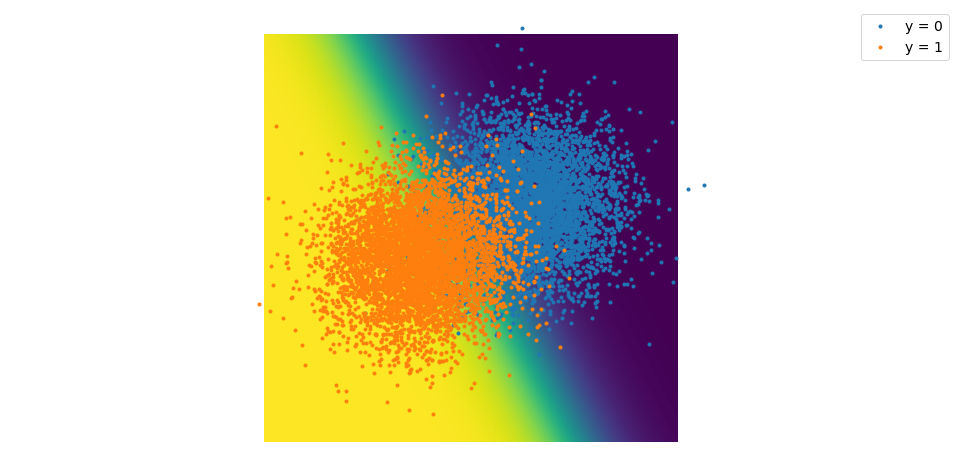

In [25]:
## Plot Decision Function
## 2D grid

q = 201
## Linear array in each feature range
tx = np.linspace( X_[:,0].min(), X_[:,0].max(),num=q) 
ty = np.linspace( X_[:,1].min(), X_[:,1].max(),num=q) 
## Mesh grid
[B,A] = np.meshgrid( ty,tx )

## Stack all the possible combinations
G = np.vstack([A.flatten(), B.flatten()]).transpose()

# # Evaluate class probability associated to weight vectors on this grid.
h = hypothesis(AddBias(G), fitted_weight)
theta =  sigmoid_theta(h)
theta = theta.reshape((q,q))

# Theta = theta(AddBias(G).dot(fitted_weight))
# Theta = Theta.reshape((q,q))

plt.clf
plt.subplots(figsize=(17,8))
## Image with the extention to be inside each feature range
plt.imshow(theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
# plt.imshow(Theta.transpose(), origin="lower")

plt.axis('equal')
plt.plot(X[idx_0,0], X[idx_0,1], '.', label = 'y = 0')
plt.plot(X[idx_1,0], X[idx_1,1], '.', label = 'y = 1')
plt.axis('off')
plt.ylabel("Feature 0", size=16)
plt.ylabel("Feature 1", size=16)
plt.legend(prop = {"size" : 14})

## SAG

In [27]:
X_ = AddBias(X)

w_init = np.random.randn(X_.shape[1]).reshape(-1,1)
tolerance = 0.00001
n = len(X_scaled)

max_epoch = 120
step_init = 1e-5
batch_size = 500
# batch_size = 1000


## Running SAG
fitted_weight, cost_list = sag2(X_,y, batch_size, w_init, step_init = step_init,
                               max_epoch=max_epoch, tol = tolerance, verbose=0)


## Plot cost

Max epoch reached: max_epochr = 120


Text(0.5, 1.0, '$Cost (w_l)$')

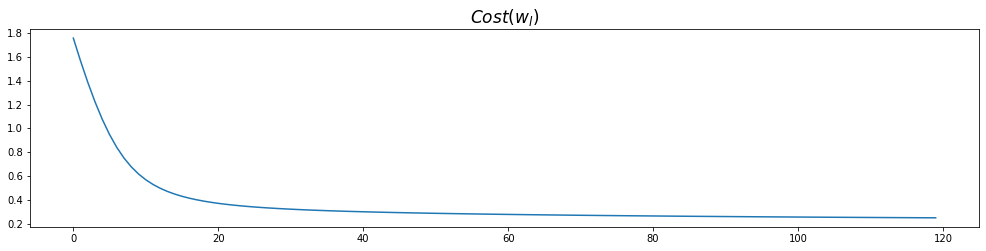

In [28]:
## display ##
plt.subplots(figsize=(17,8))
plt.subplot(2,1,1)
plt.plot(np.arange(0,len(cost_list)), cost_list)
plt.axis('tight')
plt.title('$Cost (w_l)$',  size = 17)

### Plot Decision Function

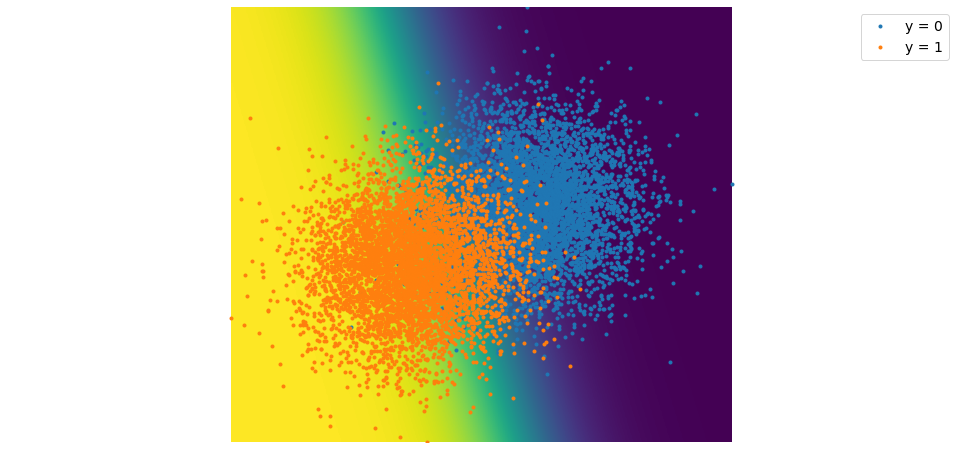

In [29]:
## Plot Decision Function
## 2D grid

q = 201
## Linear array in each feature range
tx = np.linspace( X_[:,0].min(), X_[:,0].max(),num=q) 
ty = np.linspace( X_[:,1].min(), X_[:,1].max(),num=q) 
## Mesh grid
[B,A] = np.meshgrid( ty,tx )

## Stack all the possible combinations
G = np.vstack([A.flatten(), B.flatten()]).transpose()

# # Evaluate class probability associated to weight vectors on this grid.
h = hypothesis(AddBias(G), fitted_weight)
theta =  sigmoid_theta(h)
theta = theta.reshape((q,q))


plt.clf
plt.subplots(figsize=(17,8))
## Image with the extention to be inside each feature range
plt.imshow(theta.transpose(), origin="lower",  extent=[tx.min(),tx.max(),ty.min(),ty.max()])
# plt.imshow(Theta.transpose(), origin="lower")

plt.axis('equal')
plt.plot(X[idx_0,0], X[idx_0,1], '.', label = 'y = 0')
plt.plot(X[idx_1,0], X[idx_1,1], '.', label = 'y = 1')
plt.axis('off')
plt.ylabel("Feature 0", size=16)
plt.ylabel("Feature 1", size=16)
plt.legend(prop = {"size" : 14})

# Breast Cancer (SAG)

In [30]:
data = load_breast_cancer()
X,y = data['data'], data['target']
y = MakeCol(y)
y[y==0] = -1

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [31]:
batch_size = 100
tolerance = 0.00001
max_epoch = 1500
step_init = 1e-3
batch_size = 100


X_ = AddBias(X_scaled)
w_init = np.random.randn(X_.shape[1]).reshape(-1,1)


## Running SAG
fitted_weight, cost_list = sag2(X_,y, batch_size, w_init, step_init = step_init,
                               max_epoch=max_epoch, tol = tolerance, verbose=0)

Max epoch reached: max_epochr = 1500


Text(0.5, 1.0, '$Cost(w_l)$')

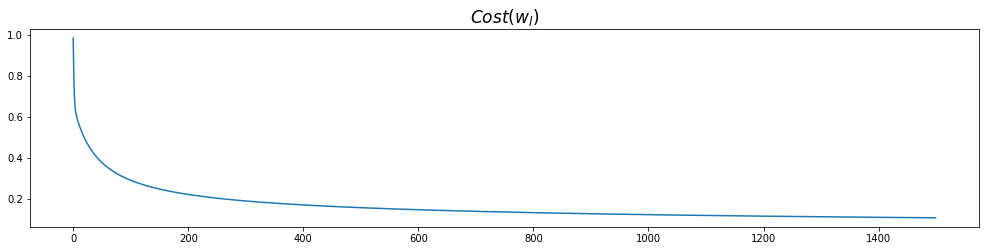

In [33]:
## display ##
plt.subplots(figsize=(17,8))
plt.subplot(2,1,1)
plt.plot(np.arange(0,len(cost_list)), cost_list)
plt.axis('tight')
plt.title('$Cost(w_l)$',  size = 17)

In [34]:
y_pred = predict(AddBias(X_scaled),fitted_weight)

In [35]:
print(acc_score(y_pred, y))

0.9824253075571178
